In [1]:
from qcg.generators import gen_supremacy, gen_hwea
from qiskit import BasicAer, execute
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit import QuantumCircuit
from qiskit.quantum_info.states.measures import state_fidelity
import numpy as np
import timeit
import matplotlib.pyplot as plt
import itertools
from qiskit.tools.visualization import dag_drawer
from qiskit.converters import circuit_to_dag, dag_to_circuit

layers = range(8,12)
dimensions = list(itertools.combinations_with_replacement(range(2,7),2))

runtime_layer = {}
for width, height in dimensions:
    if width*height>24:
        continue
    runtime_layer[(width,height)] = []
    for depth in layers:
        circ = gen_supremacy(width,height,depth)
        start = timeit.default_timer()
        backend = BasicAer.get_backend('statevector_simulator')
        job = execute(circ, backend)
        desired_vector = job.result().get_statevector(circ)
        end = timeit.default_timer()
        runtime_layer[(width,height)].append(end-start)
[print(x, runtime_layer[x]) for x in runtime_layer]

(2, 2) [0.07634760699999887, 0.07222971099999853, 0.08112661499999874, 0.07765652799999856]
(2, 3) [0.10023651500000241, 0.11197321100000224, 0.10852902699999945, 0.11316665000000015]
(2, 4) [0.13827697299999997, 0.15471958899999905, 0.15564107499999835, 0.15024558100000007]
(2, 5) [0.22705232600000258, 0.18384916000000118, 0.19683070600000008, 0.21363024900000127]
(2, 6) [0.24577039500000097, 0.25887395399999846, 0.33311651800000064, 0.2991413690000009]
(3, 3) [0.15979831599999983, 0.23731988799999826, 0.1809911789999994, 0.2151753680000006]
(3, 4) [0.2693534289999988, 0.24317541000000276, 0.30703651600000015, 0.38790354600000043]
(3, 5) [0.9780938960000007, 1.0073155139999983, 1.1137066299999994, 1.0947682010000008]
(3, 6) [4.956917232999999, 4.251620969000001, 4.451884978999999, 4.571528799999996]
(4, 4) [1.1998885309999991, 1.3096655809999973, 1.387137439, 1.3561524620000043]
(4, 5) [16.866704074000005, 17.101477029999998, 17.162479320999992, 17.41005067900001]
(4, 6) [300.60510058

[None, None, None, None, None, None, None, None, None, None, None, None]

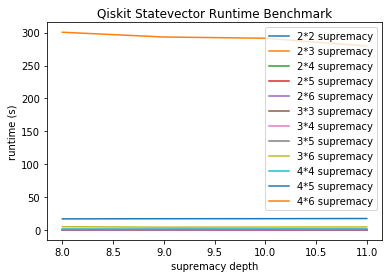

In [2]:
plt.figure()
for w,h in runtime_layer:
    plt.plot(layers,runtime_layer[(w,h)],label='%d*%d supremacy'%(w,h))
plt.xlabel('supremacy depth')
plt.ylabel('runtime (s)')
plt.title('Qiskit Statevector Runtime Benchmark')
plt.legend()
plt.show()

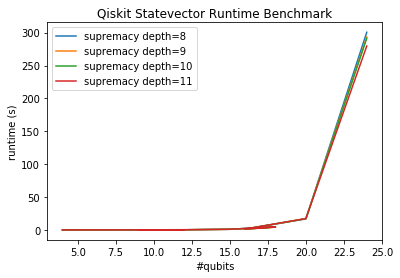

In [3]:
plt.figure()
for idx in range(0,len(runtime_layer[(4,5)])):
    plt.plot([w*h for w,h in runtime_layer],[runtime_layer[x][idx] for x in runtime_layer],label='supremacy depth=%d'%(8+idx))
plt.xlabel('#qubits')
plt.ylabel('runtime (s)')
plt.title('Qiskit Statevector Runtime Benchmark')
plt.legend()
plt.show()